## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/PhD_MasterDataset_OT_initial_Jan.csv', firstRow=60, lastRow=66)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_170123_S61-66.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=3)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=68s and ended at t=468s; mass=45.13655000000001g
This equals a volume of 45.227m; expected was 45.624mL; error is 0.87%


## Analyise surfactants

Peak threshold for 1st derivative = 0.00375 g/s and for 2nd derivative = 0.00125 g/s^2


<IPython.core.display.Javascript object>


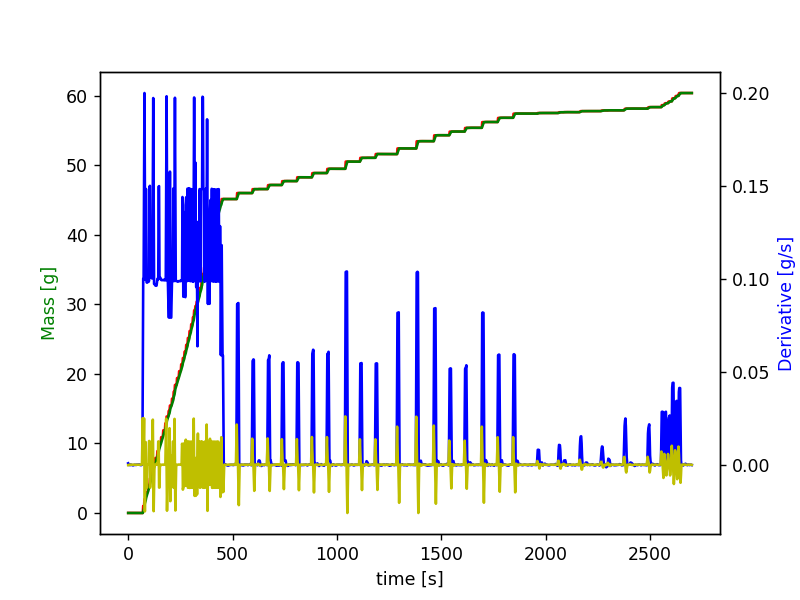

Addition of 0.867g Plantapon Amino SCG-L detected from 516s to 536s - expected volume = 0.851mL and actual volume = 0.829mL (resulting error is 2.629%)
Addition of 0.561g Plantapon Amino SCG-L detected from 590s to 610s - expected volume = 0.542mL and actual volume = 0.537mL (resulting error is 0.779%)
Addition of 0.587g Plantapon Amino SCG-L detected from 664s to 684s - expected volume = 0.542mL and actual volume = 0.563mL (resulting error is 3.929%)
Addition of 0.562g Plantapon Amino SCG-L detected from 732s to 752s - expected volume = 0.522mL and actual volume = 0.538mL (resulting error is 3.064%)
Addition of 0.545g Plantapon Amino SCG-L detected from 804s to 824s - expected volume = 0.522mL and actual volume = 0.522mL (resulting error is 0.055%)
Addition of 0.616g Plantapon Amino SCG-L detected from 876s to 896s - expected volume = 0.57mL and actual volume = 0.59mL (resulting error is 3.479%)
Addition of 0.619g Plantapon Amino SCG-L detected from 948s to 968s - expected volume = 0.

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.0045000000000000005 g/s and for 2nd derivative = 0.0015 g/s^2


<IPython.core.display.Javascript object>


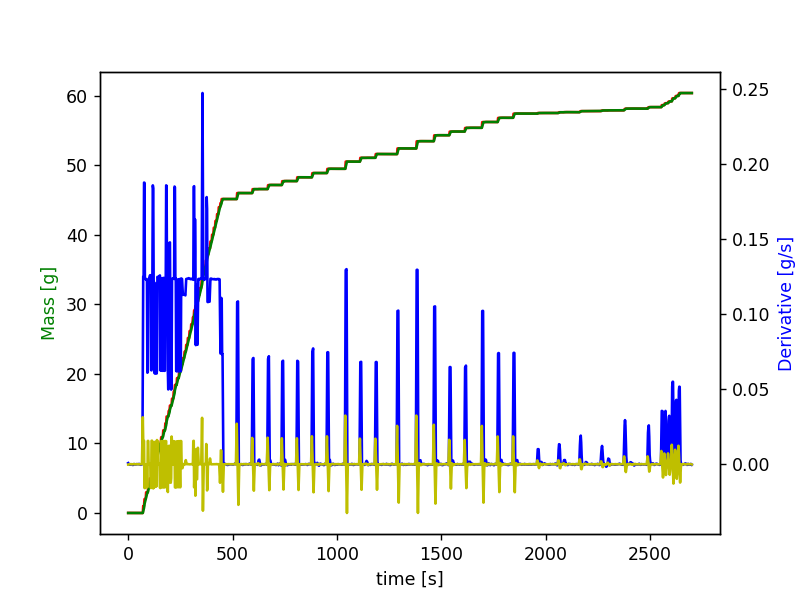

Addition of 0.078g Luviquat Excellence detected from 1958s to 1972s - expected volume = 0.099mL and actual volume = 0.07mL (resulting error is 28.75%)
Addition of 0.101g Luviquat Excellence detected from 2058s to 2074s - expected volume = 0.108mL and actual volume = 0.091mL (resulting error is 16.146%)
Addition of 0.149g Luviquat Excellence detected from 2160s to 2178s - expected volume = 0.144mL and actual volume = 0.135mL (resulting error is 6.641%)
Addition of 0.098g Luviquat Excellence detected from 2262s to 2278s - expected volume = 0.099mL and actual volume = 0.089mL (resulting error is 10.682%)
Addition of 0.247g Luviquat Excellence detected from 2372s to 2390s - expected volume = 0.234mL and actual volume = 0.223mL (resulting error is 4.856%)
Addition of 0.215g Luviquat Excellence detected from 2484s to 2502s - expected volume = 0.198mL and actual volume = 0.194mL (resulting error is 2.045%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.0135 g/s and for 2nd derivative = 0.00675 g/s^2


<IPython.core.display.Javascript object>


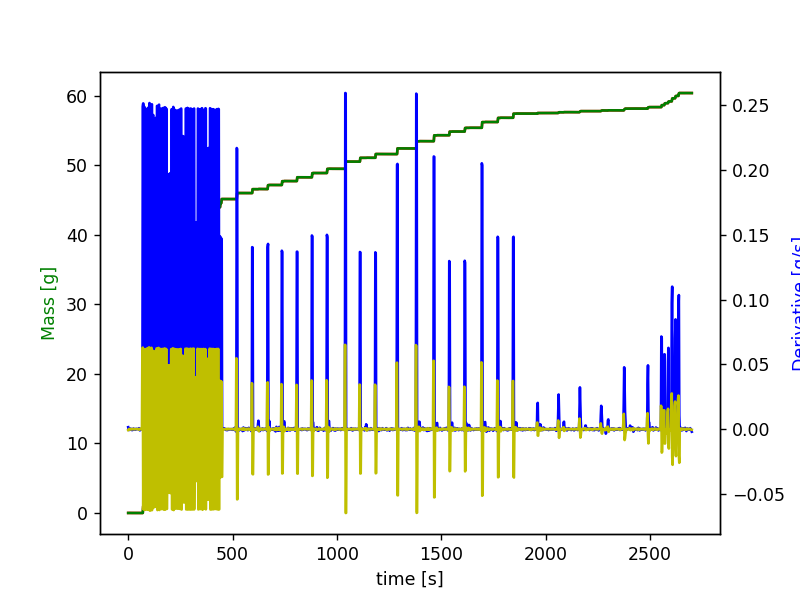

Addition of 0.284g Arlypon TT detected from 2550s to 2562s - expected volume = 0.28mL and actual volume = 0.294mL (resulting error is 5.185%)
Addition of 0.284g Arlypon TT detected from 2564s to 2576s - expected volume = 0.228mL and actual volume = 0.295mL (resulting error is 29.318%)
Addition of 0.265g Arlypon TT detected from 2582s to 2594s - expected volume = 0.187mL and actual volume = 0.275mL (resulting error is 47.222%)
Addition of 0.44g Arlypon TT detected from 2600s to 2612s - expected volume = 0.415mL and actual volume = 0.456mL (resulting error is 9.875%)
Addition of 0.342g Arlypon TT detected from 2616s to 2628s - expected volume = 0.26mL and actual volume = 0.355mL (resulting error is 36.6%)
Addition of 0.41g Arlypon TT detected from 2632s to 2644s - expected volume = 0.385mL and actual volume = 0.426mL (resulting error is 10.811%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S61-S66.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_19180\3681994794.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
60,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.658164,8.150623,0.0,0.783041,0.0,0.0,0.0,0.0,2.837432
61,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.291321,10.196423,0.0,0.989884,0.0,0.0,0.0,0.0,2.798729
62,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.852974,8.306488,0.0,1.465259,0.0,0.0,0.0,0.0,2.599456
63,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.152231,10.387229,0.0,0.967158,0.0,0.0,0.0,0.0,4.326372
64,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.148488,8.050591,0.0,2.423947,0.0,0.0,0.0,0.0,3.346247
65,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.721113,11.777652,0.0,2.123920,0.0,0.0,0.0,0.0,4.040868
